## Task 1 :- Student Marks Predications

1. Simple Linear Regression problem with 2 variable
2. Language : Python3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "http://bit.ly/w-data"
student_marks = pd.read_csv(url)
student_marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [3]:
student_marks.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
X = student_marks['Hours']
X = np.array(X).reshape((-1,1))
y = student_marks['Scores']
y = np.array(y).reshape((-1,1))

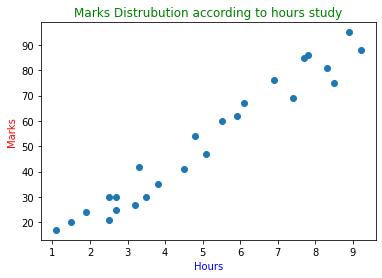

In [5]:
plt.title("Marks Distrubution according to hours study",c='g')
plt.xlabel('Hours',c='b')
plt.ylabel('Marks',c='r')
plt.scatter(X,y)

Now converting data in train and test data

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts

In [7]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.33, random_state=42)

In [8]:
# Training simple linear regression 
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

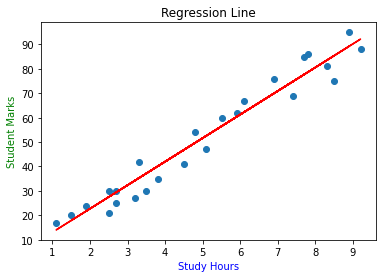

In [9]:
# finding the line of regression
line = LR.coef_ * X + LR.intercept_

# Ploting line with test data
plt.title("Regression Line")
plt.xlabel("Study Hours",c='b')
plt.ylabel("Student Marks",c='g')
plt.scatter(X,y)
plt.plot(X,line,c='r')

<b>Predition on test Data</b>

In [10]:
print(X_test)
y_pred = LR.predict(X_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]
 [2.7]
 [3.3]
 [5.1]
 [3.8]]


In [11]:
predicated = pd.DataFrame({'Actual': y_test.reshape(len(y_test)), 'Predicted': y_pred.reshape(len(y_pred))}) 
predicated

,Actual,Predicted
0,81,83.502444
1,30,27.530757
2,21,27.530757
3,76,69.992037
4,62,60.341746
5,25,29.460815
6,42,35.250990
7,47,52.621513
8,35,40.076135


<b>QUESTION<b> : What will be the predicted score if a student studies for 9.25hrs/day ?

In [12]:
Study_hr = 9.25
new_X = np.array(Study_hr).reshape((-1,1))
marks = LR.predict(new_X)
print(marks.reshape(1))

[92.67022038]


<b>ANSWER</b> : 92.67022038

### <b>Evaluating the model</b>

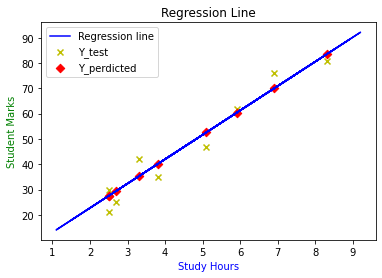

In [13]:
# Ploting line with test data
plt.title("Regression Line")
plt.xlabel("Study Hours",c='b')
plt.ylabel("Student Marks",c='g')
plt.scatter(X_test,y_test,c='y',marker='x')
plt.scatter(X_test,y_pred,c='r',marker='D')
plt.plot(X,line,c='b')
plt.legend(("Regression line", "Y_test", "Y_perdicted"))
plt.show()

In [14]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.564015037730867
